<a href="https://colab.research.google.com/github/DACG300/Regression-Machine-Learning/blob/main/Clasificaci%C3%B3n_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación kNN

**Alunmo:** David Alexander Cervantes Garcia

**Docente:** Jose Antonio Aviña

**Materia:** Marchine Learning

# 2.1  Fundamentos de la técnica
Es un método de aprendizaje supervisado que se utiliza tanto para clasificación como para regresión.

kNN simplemente almacena todos los datos de entrenamiento.

Cuando recibe un nuevo punto de datos para clasificar, busca en todo el conjunto de datos para encontrar los $k$ puntos (o "vecinos") que son más similares a él

### Diferencia Clave

**Clasificación:** Entra `[Número, Número, Número]` $\rightarrow$ Sale `[Categoría]`

**Regresión:** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Entra `[Número, Número, Número]` $\rightarrow$ Sale `[Número]`

| Característica | kNN para Clasificación | kNN para Regresión |
| :--- | :--- | :--- |
| **Objetivo** | Predecir una **Categoría** o Clase. | Predecir un **Valor Numérico** Continuo. |
| **Tipo de Salida** | Discreta ("Clase A", "Setosa", "Spam"). | Continua ( 25.4, $150,000). |
| **Método Final** | **Votación (Moda)**. | **Promedio (Media)**. |
| **Pregunta que Responde** | "¿A qué grupo pertenece este dato?" | "¿Cuál es el valor de este dato?" |
| **Ejemplo** | Clasificar una flor Iris como "Setosa". | Predecir el precio de una casa. |

Ambos procesos empiezan igual:

Calcula la distancia a todos los puntos.

Encuentra los $k$ vecinos más cercanos.Aquí es donde el camino se divide:

1. kNN para CLASIFICACIÓN: Predecir una Clase (un valor no contable o categórico)

VOTACIÓN (Moda): Se miran las etiquetas de los $k$ vecinos y se elige la que más se repite (la moda).Ejemplo: Si $k=5$ y los vecinos son {Clase A, Clase B, Clase A, Clase A, Clase B}, el resultado es Clase A. **función modo()**





2. kNN para REGRESIÓN: Predice un Número (un valor contable o continuo).
PROMEDIO (Media): Se miran los valores de los $k$ vecinos y se calcula su promedio.

Ejemplo: Si $k=5$ y quieres predecir el precio de una casa, y los precios de las 5 casas vecinas son {$100k, $110k, $105k, $100k, $115k}

el resultado es el promedio: $106k.

# 1.2  Modelo Matemático de la técnica.

1. Definición Formal (Clasificación)

Dado un conjunto de entrenamiento $D$ compuesto por $n$ pares de (características, etiqueta):$$D=\{(x_{i},y_{i})\}^{n}_{i=1}$$Para un nuevo punto $x$ que queremos clasificar, su clase predicha $\hat{y}$ se define como la moda (el valor más frecuente) de las etiquetas de sus $k$ vecinos más cercanos.$$\hat{y}=modo(\{y_{i}:x_{i}\in N_{k}(x)\})$$Donde:$N_{k}(x)$ es el conjunto que contiene los $k$ vecinos más cercanos a $x$ del conjunto de entrenamiento $D$.

$y_{i}$ es la etiqueta de un vecino $x_{i}$ que pertenece a ese conjunto de $k$ vecinos.

2. Modelo Matemático (Regresión)

Aunque el documento se centra en la clasificación (usando la moda), si estuviéramos haciendo regresión kNN (para predecir un número), la fórmula de predicción $\hat{y}$ cambiaría de la moda al promedio (media) de los valores de los vecinos:$$\hat{y}=\frac{1}{k}\sum_{x_{i}\in N_{k}(x)}y_{i}$$


In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- 1. Cargar y Explorar el Dataset ---
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')

print("--- Primeras 5 filas de X (Características) ---")
print(X.head())
print("\n--- Primeras 5 filas de y (Objetivo) ---")
print(y.head())



--- Primeras 5 filas de X (Características) ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

--- Primeras 5 filas de y (Objetivo) ---
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


`import pandas as pd:` Usada para manejar datos en tablas (conocidas como DataFrames).

`import seaborn as sns:` Importa seaborn, una librería para hacer gráficas estadísticas avanzadas.

`import matplotlib.pyplot as plt:` Importa matplotlib, la librería base para crear gráficas, sobre la cual funciona seaborn.

`from sklearn.datasets import load_iris:` De la librería scikit-learn (la librería principal de Machine Learning), importa la función específica para cargar el dataset Iris.

`from sklearn.model_selection import train_test_split:` Importa la herramienta para dividir los datos en un conjunto de entrenamiento y uno de prueba.

`from sklearn.preprocessing import StandardScaler:` Importa la herramienta para escalar los datos (un paso crítico para kNN).

`from sklearn.neighbors import KNeighborsClassifier:` Importa el modelo kNN (el clasificador).

`from sklearn.metrics import:` Importa las funciones para evaluar qué tan bueno es el modelo (matriz de confusión, accuracy, etc.).

In [80]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


count: El número total de filas (para saber si faltan datos).

mean: El valor promedio (la media) de cada columna.

std: La desviación estándar (qué tan dispersos están los datos).

min: El valor mínimo en cada columna.

25%: El primer cuartil (el valor por debajo del cual se encuentra el 25% de los datos).

50%: La mediana (el valor medio exacto de los datos).

75%: El tercer cuartil (el valor por debajo del cual se encuentra el 75% de los datos).

max: El valor máximo en cada columna.

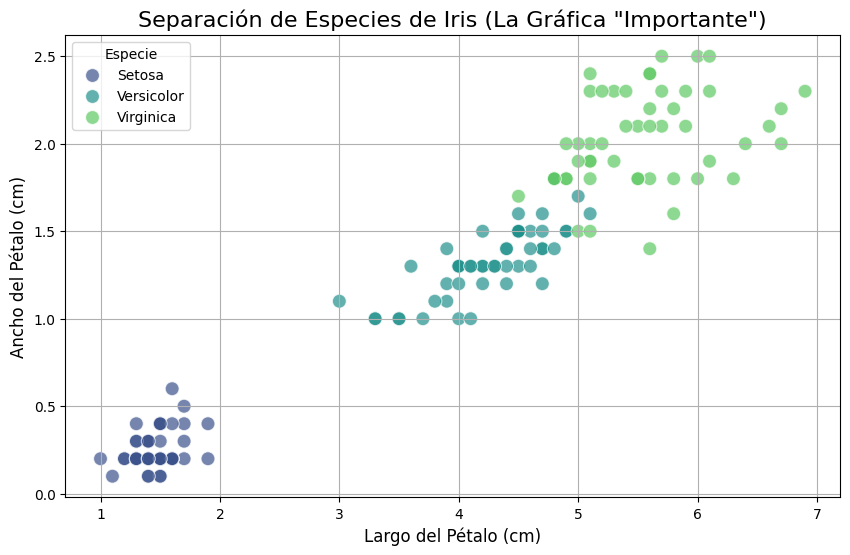

In [81]:
plt.figure(figsize=(10, 6)) # Ajusta el tamaño de la figura

sns.scatterplot(
    x=X['petal length (cm)'],  # Característica en el eje X
    y=X['petal width (cm)'],   # Característica en el eje Y
    hue=y_species,             # Colorear los puntos según la especie
    palette='viridis',         # Esquema de color
    s=100,                     # Tamaño de los puntos
    alpha=0.7                  # Transparencia
)

# Añadir títulos y etiquetas
plt.title('Separación de Especies de Iris (La Gráfica "Importante")', fontsize=16)
plt.xlabel('Largo del Pétalo (cm)', fontsize=12)
plt.ylabel('Ancho del Pétalo (cm)', fontsize=12)
plt.legend(title='Especie')
plt.grid(True) # Añadir una cuadrícula
plt.show()



se colocó la gráfica más importante para la observación de este modelo: un scatterplot que compara el 'Largo del Pétalo' (eje X) contra el 'Ancho del Pétalo' (eje Y).

In [82]:
# --- 3. FEATURE ENGINEERING (Selección de Características) ---
print("\n--- 3. Seleccionando Características ---")
# Basado en la gráfica, se seleccionan solo las 2 características del pétalo
selected_features = ['petal length (cm)', 'petal width (cm)']
X = X_original[selected_features] # 'X' ahora solo tiene 2 características
print("Características seleccionadas (primeras 5 filas):")
print(X.head())


--- 3. Seleccionando Características ---
Características seleccionadas (primeras 5 filas):
   petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2


### Feature Engineering

En esta etapa se seleccionan las variables o características más relevantes del conjunto de datos que serán utilizadas por el modelo **k-Nearest Neighbors (kNN)** para realizar la clasificación.

El proceso consiste en:
- **Identificar las columnas predictoras (features)** que contienen información útil para distinguir entre clases.  
- **Eliminar variables irrelevantes o redundantes** que no aporten valor a la predicción.  
- **Normalizar o escalar los datos**, ya que kNN depende de las distancias entre puntos, y las diferencias de escala pueden afectar el resultado.

En este caso, se seleccionan las siguientes variables como *features (X)* y la columna de clase como *target (y)*:


In [83]:
# --- 2. Dividir los datos (Train/Test Split) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Datos de entrenamiento: {X_train.shape[0]} muestras")
print(f"Datos de prueba: {X_test.shape[0]} muestras")

Datos de entrenamiento: 105 muestras
Datos de prueba: 45 muestras


Un conjunto de entrenamiento (el 70% de los datos) para enseñar al modelo.

Un conjunto de prueba (el 30% restante) para evaluarlo.

In [84]:
# El scaler se ajusta ('fit') SOLO al X_train (de 2 características)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

El algoritmo kNN funciona midiendo la distancia entre puntos. Si una característica (como petal length [1.0 a 6.9 cm]) tiene un rango de valores mucho más grande que otra (como petal width [0.1 a 2.5 cm]), la característica con los números más grandes dominará injustamente el cálculo de la distancia, y las otras características serán ignoradas.

entonces se reduce a media 0 y con la desviacion estandar en 1 para que tengan la misma importancia

In [85]:
# --- 4. Crear y Entrenar el Modelo kNN ---
# Usaremos k=5. Es un hiperparámetro común para empezar.
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Entrenar el modelo con los datos de entrenamiento escalados
knn.fit(X_train_scaled, y_train)
print(f"\nModelo kNN (k={k}) entrenado.")


Modelo kNN (k=5) entrenado.


k = 5: Se establece el hiperparámetro k=5. Esto define que el modelo usará 5 vecinos para tomar sus decisiones (votar) al momento de clasificar un nuevo dato.

knn = KNeighborsClassifier(...): Se crea una instancia del modelo clasificador kNN, pasándole el valor k=5 como su número de vecinos (n_neighbors).

knn.fit(X_train_scaled, y_train): Esta es la línea de "entrenamiento". El modelo memoriza todos los datos de entrenamiento escalados (X_train_scaled) junto con sus etiquetas correctas (y_train). A este proceso se le conoce como "aprendizaje vago" (lazy learning)

In [86]:
# --- 5. Realizar Predicciones ---
# Usamos los datos de prueba (X_test_scaled) para que el modelo prediga 'y'
y_pred = knn.predict(X_test_scaled)

Para cada flor en el conjunto de prueba, el modelo "vota" usando sus $k=5$ vecinos más cercanos. Las "respuestas" del modelo se almacenan en la nueva variable y_pred para poder evaluarlas.

In [87]:
# --- 6. Evaluar el Modelo ---
print("\n--- Evaluación del Modelo kNN ---")

# Precisión (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión (Accuracy): {accuracy * 100:.2f}%')



--- Evaluación del Modelo kNN ---
Precisión (Accuracy): 91.11%


código calcula la Precisión (Accuracy), la métrica principal que mide la efectividad del modelo kNN.

Un resultado del 91.11% significa que el modelo clasificó correctamente el 91.11% de las muestras en el conjunto de prueba.

El modelo logró predecir la especie correcta para aproximadamente 91 de cada 100 flores que nunca antes había visto.

In [88]:

# Matriz de Confusión
print("\n--- Matriz de Confusión ---")
# Filas = Valor Real, Columnas = Valor Predicho
cm = confusion_matrix(y_test, y_pred)
print(cm)



--- Matriz de Confusión ---
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


`Matriz de confusion`

La Matriz de Confusión es una tabla que resume el rendimiento de un modelo de clasificación. Lo hace comparando las etiquetas reales (la verdad) con las etiquetas que predijo el modelo.

Su propósito principal es mostrarte exactamente dónde se está "confundiendo" el modelo.




(Filas = **Valor Real**, Columnas = **Valor Predicho**)

| | Predijo: Setosa (0) | Predijo: Versicolor (1) | Predijo: Virginica (2) | **Total Real** |
| :--- | :---: | :---: | :---: | :---: |
| **Real: Setosa (0)** | **15** | 0 | 0 | **15** |
| **Real: Versicolor (1)**| 0 | **14** | **1** | **15** |
| **Real: Virginica (2)**| 0 | **3** | **12** | **15** |

---

**1. La Diagonal (Aciertos)**:
* `[15, 0, 0]`: Había 15 **Setosas** reales, y el modelo predijo **correctamente** las 15 como Setosa. (¡Perfecto!)
* `[0, 14, 1]`: Había 15 **Versicolor** reales, y el modelo predijo **correctamente** 14 de ellas como Versicolor.
* `[0, 3, 12]`: Había 15 **Virginicas** reales, y el modelo predijo **correctamente** 12 de ellas como Virginica.

**2. Fuera de la Diagonal (Errores)**:
* `[0, 14, 1]` (Fila **Versicolor**): Hubo **1** flor que **era Versicolor**, pero el modelo **se equivocó** y la predijo como **Virginica** (Columna 2).
* `[0, 3, 12]` (Fila **Virginica**): Hubo **3** flores que **eran Virginica**, pero el modelo **se equivocó** y las predijo como **Versicolor** (Columna 1).

**Conclusión:** El modelo es perfecto para identificar **Setosa**. Su principal "confusión" (4 errores en total) ocurre entre **Versicolor** y **Virginica**. Se equivoca un poco más al clasificar las Virginica (pensando que son Versicolor), lo cual es un error común ya que son las dos clases más parecidas.

In [89]:

# Reporte de Clasificación (Precisión, Recall, F1-score)
print("\n--- Reporte de Clasificación ---")
# Muestra métricas detalladas para cada clase
print(classification_report(y_test, y_pred, target_names=iris.target_names))


--- Reporte de Clasificación ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45




> Clasificacion de Reportes:
resumen detallado de qué tan bien funciona tu modelo de clasificación para cada una de las clases.

Precision: Qué tan exactas fueron las predicciones para esa clase.

Recall: Cuántas de las instancias reales de esa clase encontró el modelo.

F1-score: Un balance entre las dos métricas anteriores.

El uso de target_names hace que el reporte sea fácil de leer al mostrar los nombres de las especies en lugar de solo los números 0, 1 y 2.

In [95]:

def predecir_flor(patron):
    """
    Recibe [largo_petalo, ancho_petalo] y predice la especie.
    Usa el 'scaler' y 'knn' ya entrenados.
    """
    # Crear DataFrame con los nombres de columnas originales
    columnas = ['largo_petalo', 'ancho_petalo']  # usa los nombres exactos de tu dataset
    patron_df = pd.DataFrame([patron], columns=columnas)

    # Escalar el patrón
    patron_scaled = scaler.transform(patron_df)

    # Predecir
    clase_num = knn.predict(patron_scaled)[0]

    return iris.target_names[clase_num]


print(f"\nLas medidas {flor_misteriosa} pertenecen a la especie: {prediccion}")


Las medidas [5.1, 1.8] pertenecen a la especie: virginica


Nos muestra una prediccion con el kNN ya entrenado para clasificar una flor nueva y desconocida.

Al darle las medidas de la flor este modelo lo que hace es clasificar (modelo: Moda) y darnos una categoria.

Escala el nuevo patrón usando el scaler que ya fue "entrenado".

Predice la clase (el número 0, 1 o 2) usando el modelo knn entrenado.

Traduce el número a un nombre legible ("Virginica").